In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd

## Reading and understanding the data 

In [6]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df.shape

(730, 16)

In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
df.drop(['instant','dteday','casual','registered'], axis = 1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
df.shape

(730, 12)

## Mapping the categorical variables for better EDA and analysis 
# **season, weekday , weathersit and month**

In [12]:
df['season']=df[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}) )
df['weekday']=df[['weekday']].apply(lambda x: x.map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday',4:'thursday',5:'friday',6:'saturday'}) )
df['weathersit']=df[['weathersit']].apply(lambda x: x.map({1:'Good', 2:'Fair', 3:'Bad', 4:'VeryBad'}) )
df['mnth']=df[['mnth']].apply(lambda x: x.map({1:'January', 2:'February', 3:'March', 4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}) )
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,saturday,0,Fair,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,sunday,0,Fair,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#converting data type of these variables to object 
df['season']=df['season'].astype('object')
df['mnth']=df['mnth'].astype('object')
df['weathersit']=df['weathersit'].astype('object')
df['weekday']=df['weekday'].astype('object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Data type has been successfully changed

## EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1440x1440 with 0 Axes>

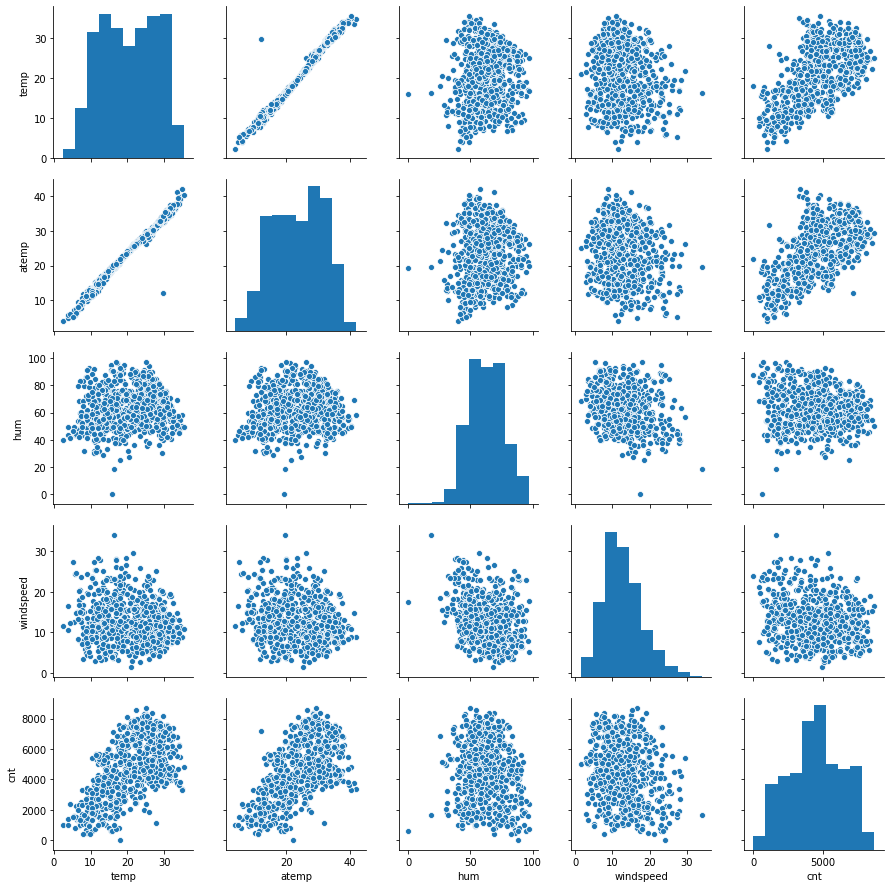

In [16]:
#plotting pair plot to see the relationships between continious numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
plt.figure(figsize=(20, 20))
sns.pairplot(df[num_vars])
plt.show()

- There target variable (cnt) is directly propotional to temp and atemp.
- There target variable (cnt) is inversly propotional to humidity.
- There is high co relation between temp and atemp.

Now based on our pairplot we will polt jointplots of the continious variables that have some relationship with cnt

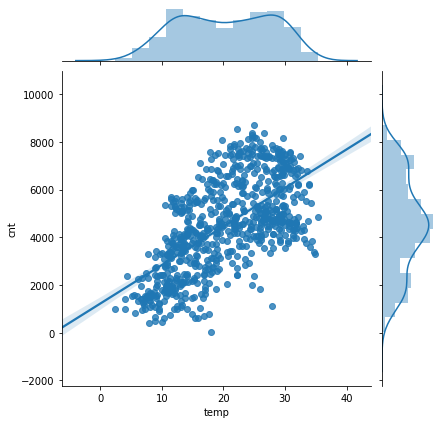

In [380]:
sns.jointplot( "temp","cnt", data=df, kind="reg")
plt.show()

There is hight positive corealtion between cnt and temp

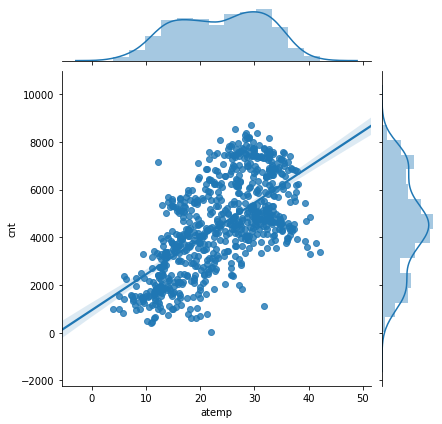

In [381]:
sns.jointplot( "atemp","cnt", data=df, kind="reg")
plt.show()

There is hight positive corealtion between cnt and atemp

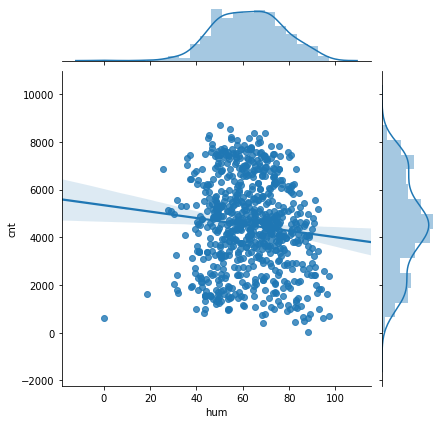

In [383]:
sns.jointplot( "hum","cnt", data=df, kind="reg")
plt.show()

There is some negative corelation b etween humidity and cnt. Although not that strong 

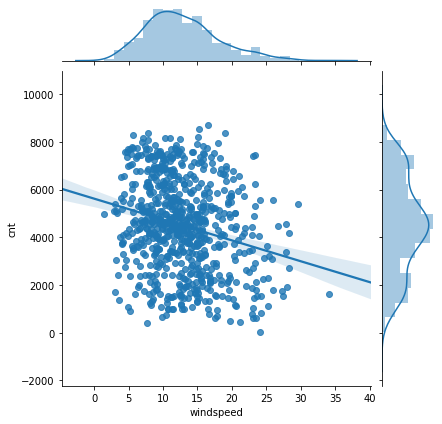

In [384]:
sns.jointplot( "windspeed","cnt", data=df, kind="reg")
plt.show()

There is some negative corelation b etween Windspeed and cnt. Although not that strong

## Analysing categorical variables 

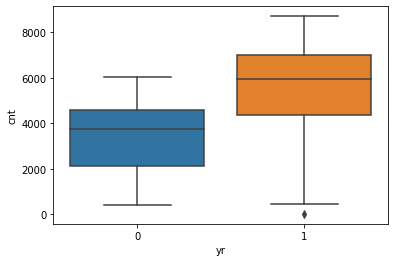

In [370]:
sns.boxplot(x='yr',y='cnt',data=df)
plt.show()

Bookings have increased significantly from 2018 to 2019.Hence the popularity of the bike rental is increasing. 

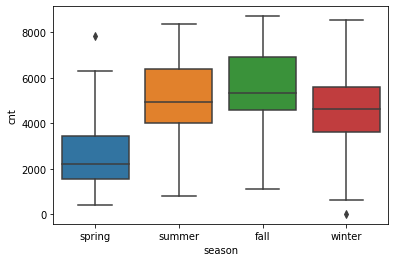

In [305]:
sns.boxplot(x='season',y='cnt',data=df)
plt.show()

•	The bookings are maximum for fall season followed by summer and then by winter and spring. With the least being for spring.

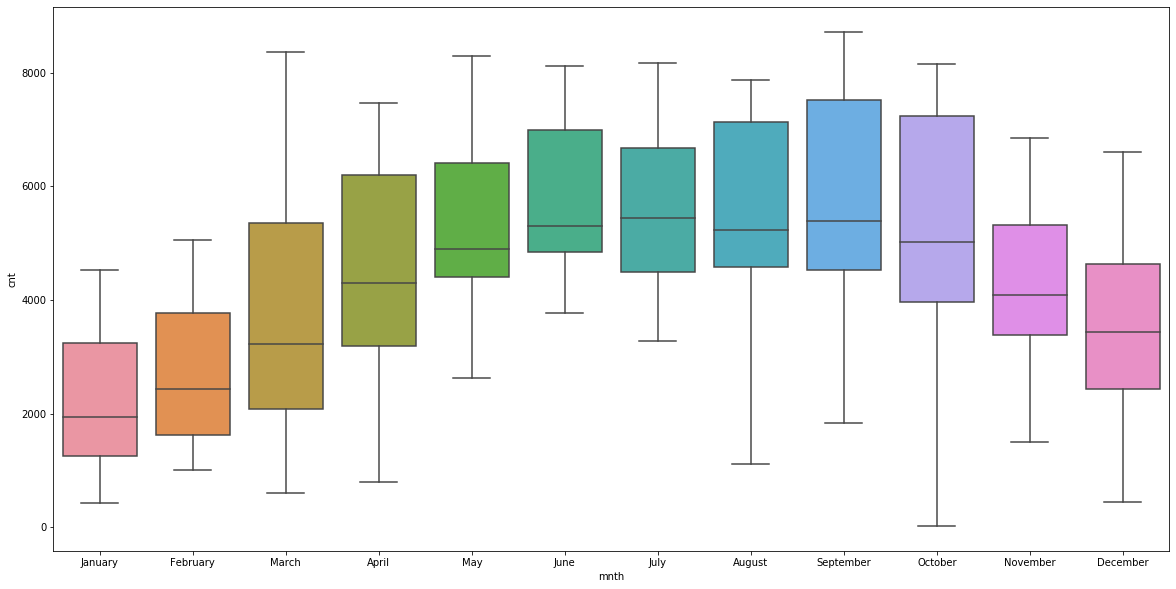

In [306]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="mnth", y="cnt", data=df)
plt.show()

•	The month of September has most number of bookings. May, June, July and august also have significant amount of bookings. March and October are very uncertain months as their boxplot is very widely distributed. They have high bookings in some case while low booking also. 

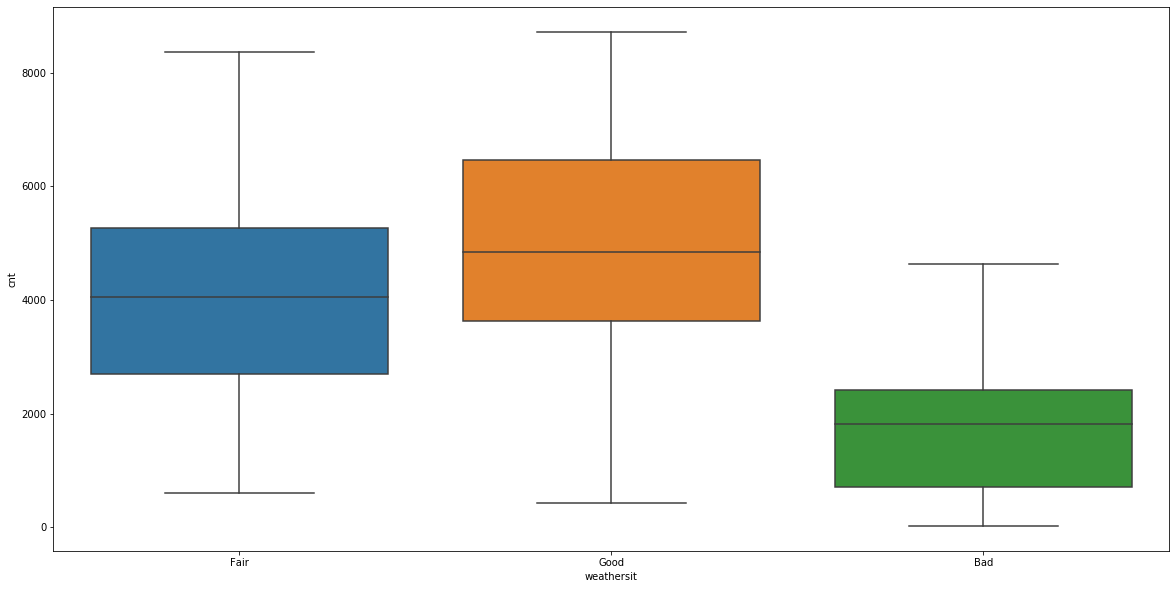

In [307]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="weathersit", y="cnt", data=df)
plt.show()

- Bookings are very low for bad weather 
- Good weather shows the most number of bookings

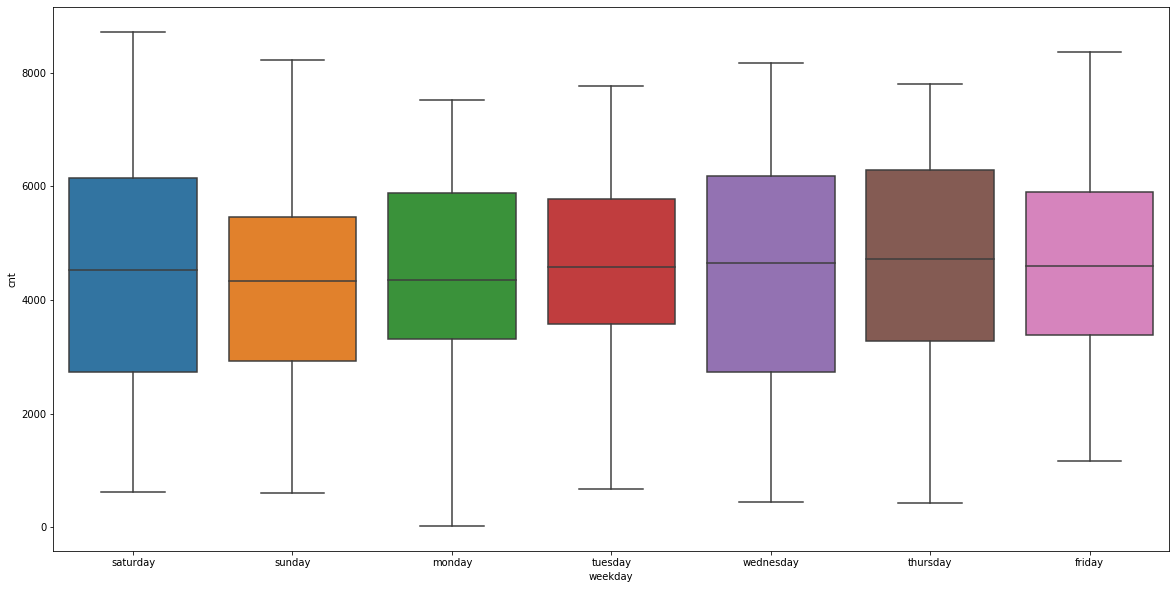

In [308]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="weekday", y="cnt", data=df)
plt.show()

- Nothing specific and strong can be about the relation between cnt and weekdays 

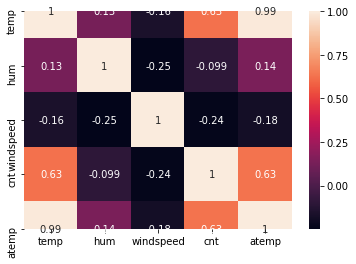

In [374]:
num_vars = ['temp','hum', 'windspeed','cnt','atemp',]
sns.heatmap(df[num_vars].corr(),annot=True)

## DATA PREPRATION

In [309]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,saturday,0,Fair,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,sunday,0,Fair,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


## **Dummy variables**

In [310]:
status = pd.get_dummies(df['season'], drop_first = True)
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [311]:
status_month= pd.get_dummies(df['mnth'], drop_first = True)
status_month.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [312]:
status_weekday = pd.get_dummies(df['weekday'], drop_first = True)
status_weekday.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [313]:
status_weathersit = pd.get_dummies(df['weathersit'], drop_first = True)
status_weathersit.head()

,Fair,Good
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [314]:
#concatenating all the new created dummy variables to the dataframe 
df = pd.concat([df,status,status_month,status_weekday,status_weathersit], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,October,September,monday,saturday,sunday,thursday,tuesday,wednesday,Fair,Good
0,spring,0,January,0,saturday,0,Fair,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,January,0,sunday,0,Fair,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,spring,0,January,0,monday,1,Good,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,1
3,spring,0,January,0,tuesday,1,Good,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,1
4,spring,0,January,0,wednesday,1,Good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,1


In [315]:
#Now we will drop the orignal columns for which we created dummies 
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,monday,saturday,sunday,thursday,tuesday,wednesday,Fair,Good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,1


## Splitting the data 

In [316]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

# sclaing the numeric variables through min max scaler 

In [317]:
from sklearn.preprocessing import MinMaxScaler

In [318]:
scaler = MinMaxScaler()

In [319]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt'] #list of numeric variables 

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [320]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,monday,saturday,sunday,thursday,tuesday,wednesday,Fair,Good
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


## RFE

In [321]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [322]:
y_train = df_train.pop('cnt')
X_train = df_train

In [323]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 17)           
rfe = rfe.fit(X_train, y_train)

In [324]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 5),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 10),
 ('March', False, 11),
 ('May', False, 4),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('monday', False, 7),
 ('saturday', True, 1),
 ('sunday', False, 6),
 ('thursday', False, 9),
 ('tuesday', False, 8),
 ('wednesday', False, 13),
 ('Fair', True, 1),
 ('Good', True, 1)]

In [325]:
# RFE selected variable 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'December', 'January', 'July', 'November',
       'September', 'saturday', 'Fair', 'Good'],
      dtype='object')

In [326]:
# RFE rejected variables 
X_train.columns[~rfe.support_]

Index(['atemp', 'August', 'February', 'June', 'March', 'May', 'October',
       'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [327]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [328]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [329]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear modelb

In [330]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          9.55e-191
Time:                        23:37:50   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.048      0.389      0.6

In [331]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,127.90
3,temp,67.12
4,atemp,56.09
22,saturday,29.06
23,sunday,27.51
7,spring,10.80
28,Good,10.64
9,winter,9.52
27,Fair,9.22
8,summer,8.31


**As we can see above that holiday has a hiigh p-value. So we will remove this variable as it is insignificant and create a new model after it.**

In [332]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [333]:
 X_train_lm = sm.add_constant(X_train_new)

In [334]:
lm = sm.OLS(y_train,X_train_lm).fit()   

In [335]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          4.53e-191
Time:                        23:37:51   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0126      0.048      0.260      0.7

In [337]:

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,153.09
16,Good,10.41
15,Fair,8.95
6,spring,5.26
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.94
12,November,1.73
10,January,1.68


**In this model all the varialles have low p value but Good has a hogh VIF so now we will drop Good and create a new model** 

In [338]:
X_train_new = X_train_new.drop(["Good"], axis = 1)

In [339]:
X_train_lm = sm.add_constant(X_train_new)

In [340]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [341]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     150.4
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          3.99e-173
Time:                        23:40:08   Log-Likelihood:                 476.30
No. Observations:                 510   AIC:                            -920.6
Df Residuals:                     494   BIC:                            -852.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3255      0.040      8.156      0.0

In [342]:

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,86.99
6,spring,5.23
3,temp,4.30
8,winter,3.83
7,summer,2.75
12,November,1.72
10,January,1.67
2,workingday,1.64
14,saturday,1.64
4,hum,1.62


**Here December has high P-value. So we will drop it .** 

In [343]:
X_train_new = X_train_new.drop(["December"], axis = 1)

In [344]:
 X_train_lm = sm.add_constant(X_train_new)

In [345]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     160.9
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          6.04e-174
Time:                        23:40:24   Log-Likelihood:                 475.60
No. Observations:                 510   AIC:                            -921.2
Df Residuals:                     495   BIC:                            -857.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3149      0.039      8.102      0.0

In [346]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.45
6,spring,5.17
3,temp,3.89
8,winter,3.77
7,summer,2.66
2,workingday,1.64
13,saturday,1.64
4,hum,1.62
9,January,1.56
10,July,1.49


**Now November has high P-value so we will drop November. SO we will drop it**

In [347]:
X_train_new = X_train_new.drop(["November"], axis = 1)

In [348]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.0
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          1.02e-174
Time:                        23:40:27   Log-Likelihood:                 474.76
No. Observations:                 510   AIC:                            -921.5
Df Residuals:                     496   BIC:                            -862.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3070      0.038      7.995      0.0

In [349]:


vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,80.41
6,spring,5.06
3,temp,3.82
8,winter,3.59
7,summer,2.63
2,workingday,1.64
12,saturday,1.63
4,hum,1.61
9,January,1.56
10,July,1.49


**Here January has high p-value. So we will drop January**

In [350]:
X_train_new = X_train_new.drop(["January"], axis = 1)

In [351]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     186.8
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          2.02e-175
Time:                        23:40:29   Log-Likelihood:                 473.71
No. Observations:                 510   AIC:                            -921.4
Df Residuals:                     497   BIC:                            -866.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2972      0.038      7.857      0.0

In [352]:

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.84
6,spring,4.99
3,temp,3.56
8,winter,3.49
7,summer,2.61
2,workingday,1.64
11,saturday,1.63
4,hum,1.61
9,July,1.48
12,Fair,1.40


**Here all teh p-values are low but Spring has high VIF. SO we will drop spring**

In [353]:
X_train_new = X_train_new.drop(["spring"], axis = 1)

In [354]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     202.4
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          8.52e-176
Time:                        23:40:31   Log-Likelihood:                 471.83
No. Observations:                 510   AIC:                            -919.7
Df Residuals:                     498   BIC:                            -868.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2511      0.029      8.590      0.0

In [355]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.23
2,workingday,1.64
10,saturday,1.63
4,hum,1.60
3,temp,1.58
8,July,1.43
11,Fair,1.40
6,summer,1.33
7,winter,1.29
9,September,1.19


**Now all variables ahve very less p-value hence all are significant and also VIF of all the variables is below 5. Hence this will be our final model**

## Residual analysis of train data

In [356]:
y_train_cnt = lm.predict(X_train_lm)

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

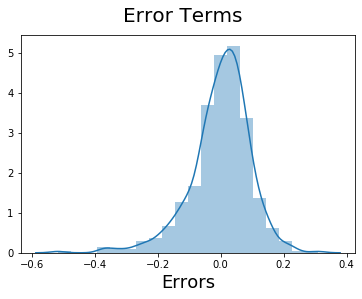

In [358]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

**The error term is normallly distributed. Hence our assumption for the linear regression is satisfied.**

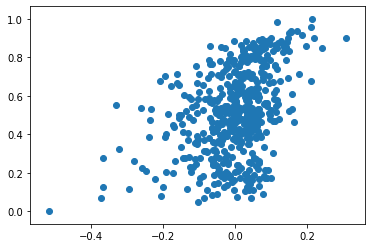

In [376]:
plt.scatter((y_train - y_train_cnt),y_train)
plt.show()

**Here we can see that the error terms distribution has no pattern. Hence error terms are independent of each other**

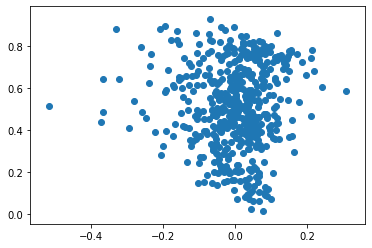

In [377]:
plt.scatter((y_train - y_train_cnt),y_train_cnt)
plt.show()

**There is no clear pattern here hence the error terms are homoscedasticity.**

## Making predictions on test set  

In [359]:
# Scaling on test set 
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [360]:
#dividing X and Y test 
y_test = df_test.pop('cnt')
X_test = df_test

In [361]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'July', 'September', 'saturday', 'Fair'],
      dtype='object')

In [362]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [363]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [364]:
y_pred = lm.predict(X_test_new)

## Model evaluation 

Text(0, 0.5, 'y_pred')

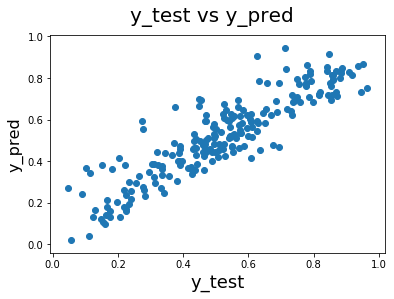

In [365]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

## R2 Score for test data 

In [366]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8036971811951698

## R2 score for train 

In [367]:
r2_score(y_train, y_train_cnt)

0.8171900868502269

**We have a good R2 score for both train and test. also the diffrence between them is very low. Hence we have a reiable model** 

## **CONCLUSION**
- From the final model we can conlcude that the following variables are important :

    1. Year : 0.2295
    2. Working Day : 0.0445
    3. Temperature : 0.6193
    4. Humidity : -0.3040
    5. Windspeed : -0.2347
    6. Summer : 0.0819
    7. Winter : 0.1328
    8. July : -0.0529
    9. Spetember : 0.0880
    10. Saturday : 0.0528
    11. Fair : -0.0239
 
- Hence the model predicts total number of bike rentals from these variables.

### Top three variables :
    
    1. Year
    2. Working day
    3. Temperature